# Knn ALgorithm - k-Nearest Neighbors
## Dados de avaliação de census

É extremamente recomendado para algoritmos de KNN que os dados sejam padronizados, ou seja, que todos os valores sejam convertidos para números de uma mesma escala

In [4]:
#Importa o algoritmo KNN para classificação
from sklearn.neighbors import KNeighborsClassifier

In [3]:
import pickle
with open('../data/census.pkl', 'rb') as f:
    X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pickle.load(f)

In [5]:
X_census_treinamento.shape, y_census_treinamento.shape

((27676, 108), (27676,))

In [6]:
X_census_teste.shape, y_census_teste.shape

((4885, 108), (4885,))

In [17]:
knn_census = KNeighborsClassifier(n_neighbors=10, metric='minkowski')
knn_census.fit(X_census_treinamento, y_census_treinamento)

KNeighborsClassifier(n_neighbors=10)

In [23]:
previsoes = knn_census.predict(X_census_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [22]:
y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [19]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_census_teste, previsoes)


0.8290685772773797

In [21]:
print(classification_report(y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      3693
        >50K       0.71      0.51      0.59      1192

    accuracy                           0.83      4885
   macro avg       0.78      0.72      0.74      4885
weighted avg       0.82      0.83      0.82      4885



0.8290685772773797

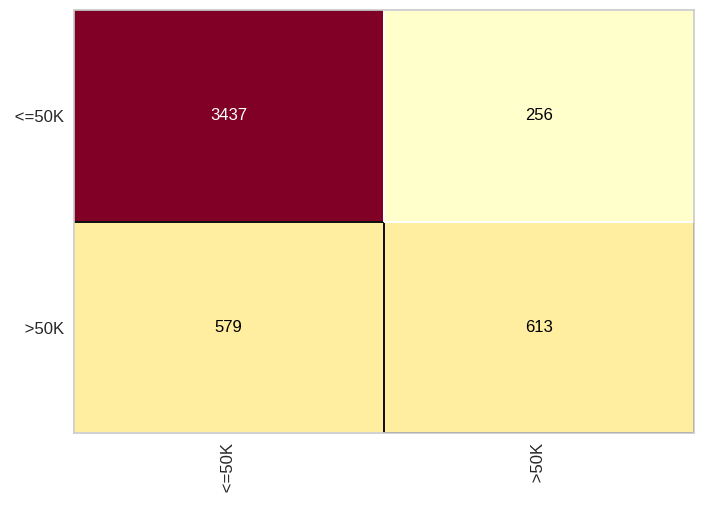

In [20]:
#Matriz de confusão para visualização dos registros
from yellowbrick.classifier import ConfusionMatrix

cm = ConfusionMatrix(knn_census)
cm.fit(X_census_treinamento, y_census_treinamento)
cm.score(X_census_teste, y_census_teste)